<a href="https://colab.research.google.com/github/satya328/titaanic-survival-predition/blob/main/titanic_survival_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [21]:

# Open the zip file
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    # Extract the desired CSV file (replace 'train.csv' with the actual filename)
    zip_ref.extract('train.csv')

# Now you can read the extracted CSV file
titanic_data = pd.read_csv('train.csv')

In [22]:
titanic_data.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='count'>

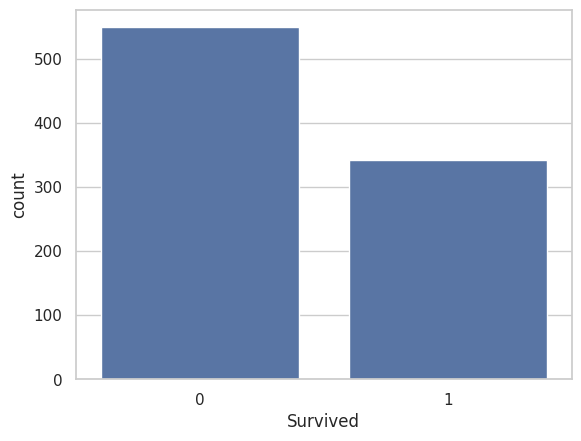

In [23]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

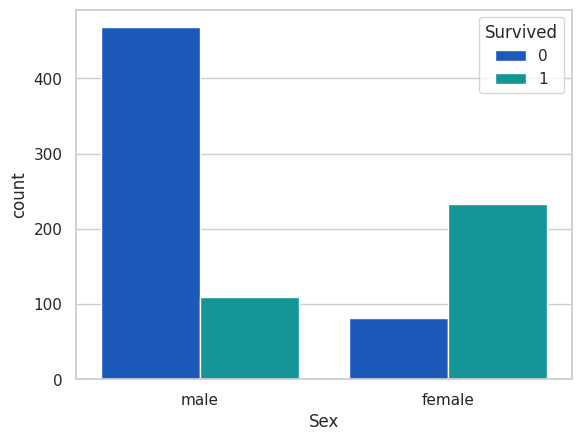

In [26]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

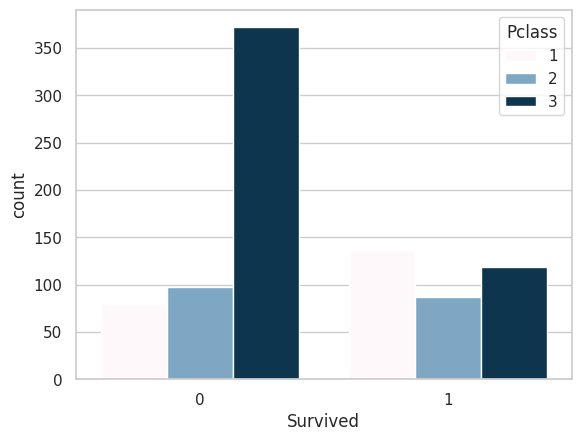

In [27]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='PuBu')

<Axes: ylabel='Frequency'>

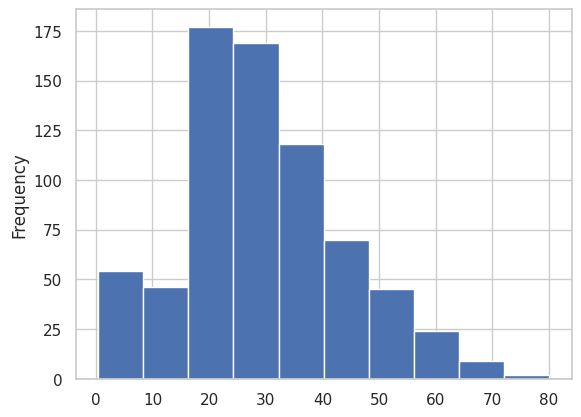

In [28]:
titanic_data['Age'].plot.hist()


<Axes: ylabel='Frequency'>

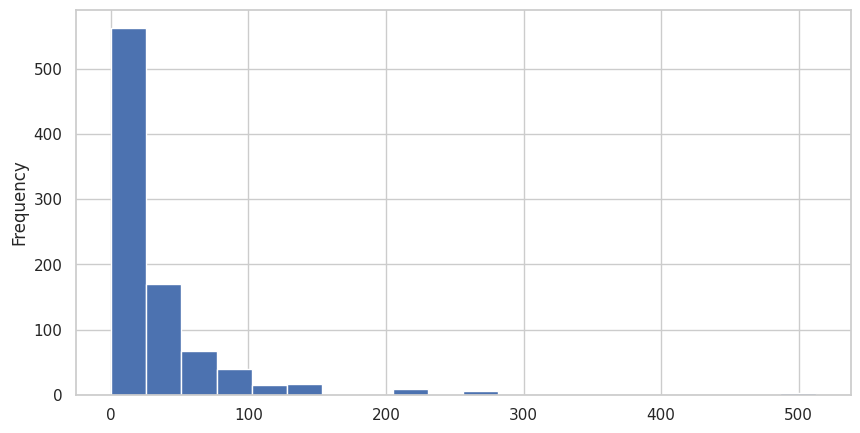

In [29]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

<ipython-input-31-bff9e0b37d31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=titanic_data,palette='rocket')


<Axes: xlabel='SibSp', ylabel='count'>

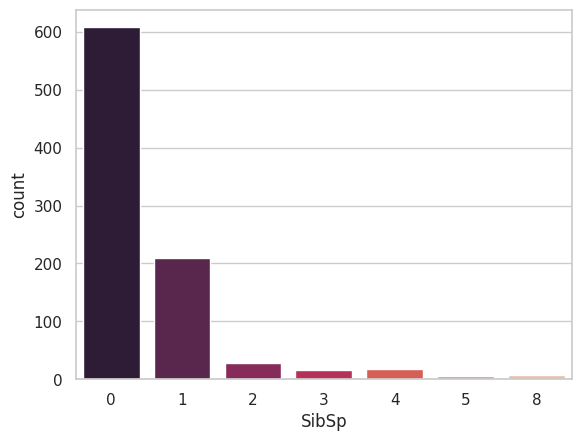

In [31]:
sns.countplot(x='SibSp',data=titanic_data,palette='rocket')

<Axes: ylabel='Frequency'>

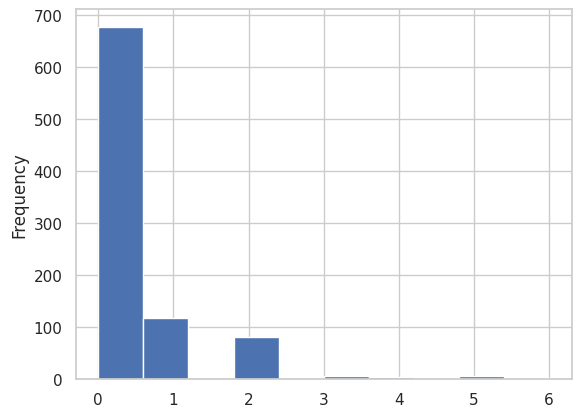

In [33]:
titanic_data['Parch'].plot.hist()

<ipython-input-34-ef3ea595bdbe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch',data=titanic_data,palette='summer')


<Axes: xlabel='Parch', ylabel='count'>

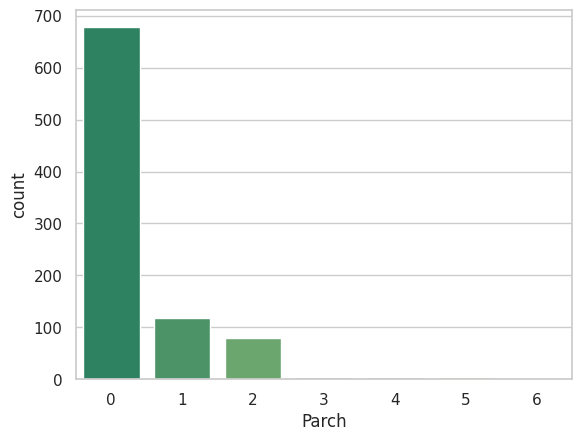

In [34]:
sns.countplot(x='Parch',data=titanic_data,palette='summer')

In [35]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: >

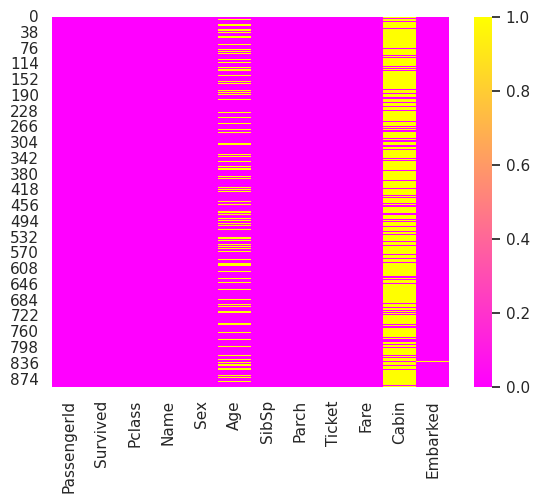

In [37]:
sns.heatmap(titanic_data.isnull(),cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

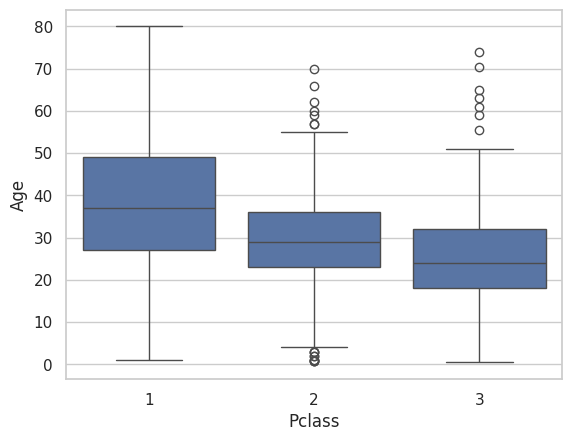

In [39]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)



In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
titanic_data.dropna(inplace=True)

<Axes: >

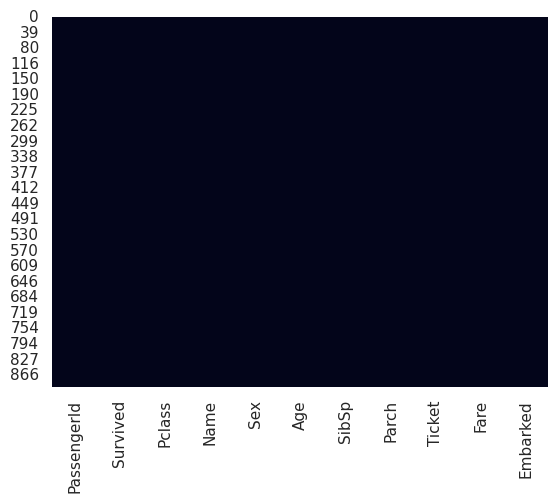

In [44]:
sns.heatmap(titanic_data.isnull(),cbar=False)

In [46]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [49]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [51]:
pd.get_dummies(titanic_data['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [57]:
sex = pd.get_dummies(titanic_data['Sex'].drop_first = True)
sex.head(3)

,male
0,True
1,False
2,False


In [58]:
embark=pd.get_dummies(titanic_data['Embarked'])

In [60]:
embark.head(3)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True


In [62]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [63]:
embark.head(3)

,Q,S
0,False,True
1,False,False
2,False,True


In [65]:
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,False,True
1,False,False
2,False,True


In [66]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [67]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True


In [73]:
titanic_data.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [74]:
titanic_data.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True


In [76]:
X=titanic_data.drop('Survived',axis=1)
Y=titanic_data['Survived']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=4)


In [80]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [82]:
X_train.columns = X_train.columns.astype(str)
lm.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
X_test.columns = X_test.columns.astype(str)
predition=lm.predict(X_test)

In [88]:
from sklearn.metrics import classification_report

In [93]:
from sklearn.metrics import classification_report
print( classification_report(predition,Y_test)) # Using the correct variable name predition

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       157
           1       0.67      0.77      0.71        78

    accuracy                           0.80       235
   macro avg       0.77      0.79      0.78       235
weighted avg       0.81      0.80      0.80       235



In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predition,Y_test)

array([[127,  30],
       [ 18,  60]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(predition,Y_test)
print(accuracy_score)

0.7957446808510639


In [ ]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
from pyngrok import ngrok
import os

try:
    # Replace "YOUR_AUTH_TOKEN" with your actual auth token from ngrok.com
    ngrok.set_auth_token("YOUR_AUTH_TOKEN")

    # Run Flask on 0.0.0.0 and port 5000 in the background
    os.system("nohup python -m flask run --host 0.0.0.0 --port 5000 --no-reload &")

    # Create a public URL for the Flask app running on port 5000
    public_url = ngrok.connect(5000)
    print("Public URL:", public_url)
except Exception as e:
    print(f"An error occurred: {e}")


ERROR:pyngrok.process.ngrok:t=2024-08-30T16:55:07+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-30T16:55:07+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-30T16:55:07+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: The authtoken you specified does not look like a proper ngrok t

An error occurred: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.
